# Single Layer Perceptron

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7725 - loss: 18.2320
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8788 - loss: 6.0846
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8881 - loss: 5.3447
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8834 - loss: 5.3550
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8835 - loss: 5.5697
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 6.0385
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-3-8e4660447039>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


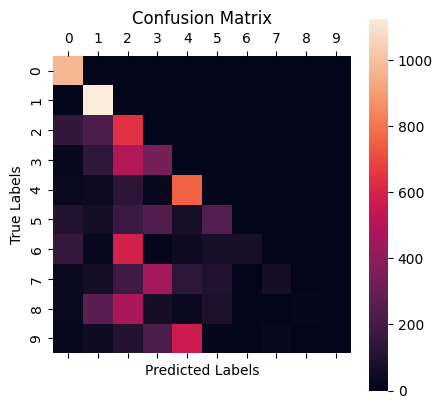

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



=== Neurons: 10 ===
Train Accuracy (last epoch): 0.8262
Test Accuracy: 0.8405

=== Neurons: 30 ===


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow import keras as ks
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test)= ks.datasets.mnist.load_data()

x_train.shape


x_test.shape

x_train[0]

plt.matshow(x_train[0])


x_train_flatten= np.reshape(x_train,(len(x_train),28*28))
x_test_flatten= np.reshape(x_test,(len(x_test),28*28))

x_train_flatten.shape


x_train_flatten[0]


model1= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model1.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
train_history1= model1.fit(x_train_flatten, y_train, epochs=5)

test_history1= model1.evaluate(x_test_flatten, y_test)


y_pred = model1.predict(x_test_flatten)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes, output_dict=True)

# Plot confusion matrix

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


neuron_list = []
train_accuracies = []
test_accuracies = []

# Loop over neurons
for neurons in range(10, 401, 20):
    model = ks.Sequential([
        ks.layers.Flatten(input_shape=(28, 28)),
        ks.layers.Dense(neurons, activation='sigmoid'),
        ks.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"\n=== Neurons: {neurons} ===")
    history = model.fit(x_train, y_train, epochs=5, verbose=0)
    train_acc = history.history['accuracy'][-1]
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print(f"Train Accuracy (last epoch): {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Store for plotting
    neuron_list.append(neurons)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(neuron_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(neuron_list, test_accuracies, label='Test Accuracy', marker='s')
plt.title('Accuracy vs Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.ylim(0.9,1)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
(x_train,y_train),(x_test,y_test)= ks.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

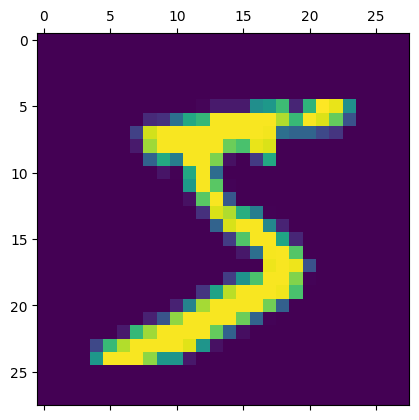

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train_flatten= np.reshape(x_train,(len(x_train),28*28))
x_test_flatten= np.reshape(x_test,(len(x_test),28*28))

x_train_flatten.shape

(60000, 784)

In [ ]:
x_train_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
model1= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model1.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
train_history1= model1.fit(x_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7688 - loss: 20.1467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8790 - loss: 5.8455
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8847 - loss: 5.5318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8849 - loss: 5.3418
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8888 - loss: 5.1806


In [ ]:
test_history1= model1.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8706 - loss: 6.7963


In [ ]:
#change in activation function

model2= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='softmax')
])
model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy',])
train_history2= model2.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7788 - loss: 17.2230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8763 - loss: 5.9518
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8835 - loss: 5.4854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8872 - loss: 5.3673
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8888 - loss: 5.1863


**conclusion**: change in activation function has significantly **LESS** impact on accuracy for **single layer Perceptron**


In [ ]:
# Normalization of inputs

x_train_flatten= x_train_flatten/255
x_test_flatten= x_test_flatten/255

model3= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history3= model3.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history3= model3.evaluate(x_test_flatten, y_test)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8073 - loss: 0.8431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9149 - loss: 0.3085
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9210 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9246 - loss: 0.2696
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9270 - loss: 0.2641

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.3048


Conclusion : Normalizing the inputs has **Significant** impact on Accuracy

In [ ]:
#Change in loss function

x_train_flatten= x_train_flatten/255
x_test_flatten= x_test_flatten/255

model3= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model3.compile(optimizer='adamax', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history3= model3.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history3= model3.evaluate(x_test_flatten, y_test)


Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1142 - loss: 2.3019
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1121 - loss: 2.3010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1103 - loss: 2.3007
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1132 - loss: 2.2999
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1150 - loss: 2.2993

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.2991


In [ ]:
model3= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model3.compile(optimizer='adamax', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history3= model3.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history3= model3.evaluate(x_test_flatten, y_test)

In [ ]:
model3= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model3.compile(optimizer='rmsprop', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history3= model3.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history3= model3.evaluate(x_test_flatten, y_test)

Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2257 - loss: 2.2796
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5594 - loss: 2.1945
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6225 - loss: 2.1127
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6566 - loss: 2.0363
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6898 - loss: 1.9634

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6902 - loss: 1.9284


In [ ]:
x_train_flatten= x_train_flatten/255
x_test_flatten= x_test_flatten/255

model3= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='softmax')
])
model3.compile(optimizer='adadelta', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history3= model3.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history3= model3.evaluate(x_test_flatten, y_test)

Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0978 - loss: 2.3027
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0904 - loss: 2.3027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0862 - loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0820 - loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0796 - loss: 2.3025

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0564 - loss: 2.3026


**Conclusion: Optimization methodsd has severe impact on accuracy**

NOTE: Only Loss function Suitable for MNIST dataset is: sparse_categorical_crossentropy

In [ ]:
x_train_flatten= np.reshape(x_train,(len(x_train),28*28))
x_test_flatten= np.reshape(x_test,(len(x_test),28*28))

x_train_flatten= x_train_flatten/255
x_test_flatten= x_test_flatten/255

model3= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history3= model3.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history3= model3.evaluate(x_test_flatten, y_test)

NameError: name 'np' is not defined

In [ ]:
# Predicting Single Datapoint


y_predicted = model3.predict(x_test_flatten)
y_predicted[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.2571461e-02, 2.5051830e-07, 4.4388998e-02, 9.4949085e-01,
       2.0523469e-03, 1.2343650e-01, 1.9944084e-06, 9.9976784e-01,
       7.5194523e-02, 5.9083766e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

np.int64(7)

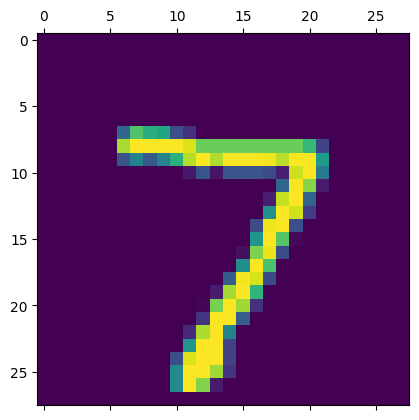

In [ ]:
plt.matshow(x_test[0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = model3.predict(x_test_flatten)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes, output_dict=True)

# Plot confusion matrix

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()



NameError: name 'model3' is not defined

# Multi- Layer Perceptron


=== Neurons: 10 ===
Train Accuracy (last epoch): 0.9219
Test Accuracy: 0.9192

=== Neurons: 30 ===
Train Accuracy (last epoch): 0.9521
Test Accuracy: 0.9511

=== Neurons: 50 ===
Train Accuracy (last epoch): 0.9624
Test Accuracy: 0.9601

=== Neurons: 70 ===
Train Accuracy (last epoch): 0.9667
Test Accuracy: 0.9621

=== Neurons: 90 ===
Train Accuracy (last epoch): 0.9714
Test Accuracy: 0.9682

=== Neurons: 110 ===
Train Accuracy (last epoch): 0.9725
Test Accuracy: 0.9681

=== Neurons: 130 ===
Train Accuracy (last epoch): 0.9752
Test Accuracy: 0.9704

=== Neurons: 150 ===
Train Accuracy (last epoch): 0.9765
Test Accuracy: 0.9718

=== Neurons: 170 ===
Train Accuracy (last epoch): 0.9772
Test Accuracy: 0.9718

=== Neurons: 190 ===
Train Accuracy (last epoch): 0.9778
Test Accuracy: 0.9740

=== Neurons: 210 ===
Train Accuracy (last epoch): 0.9793
Test Accuracy: 0.9742

=== Neurons: 230 ===
Train Accuracy (last epoch): 0.9785
Test Accuracy: 0.9730

=== Neurons: 250 ===
Train Accuracy (last ep

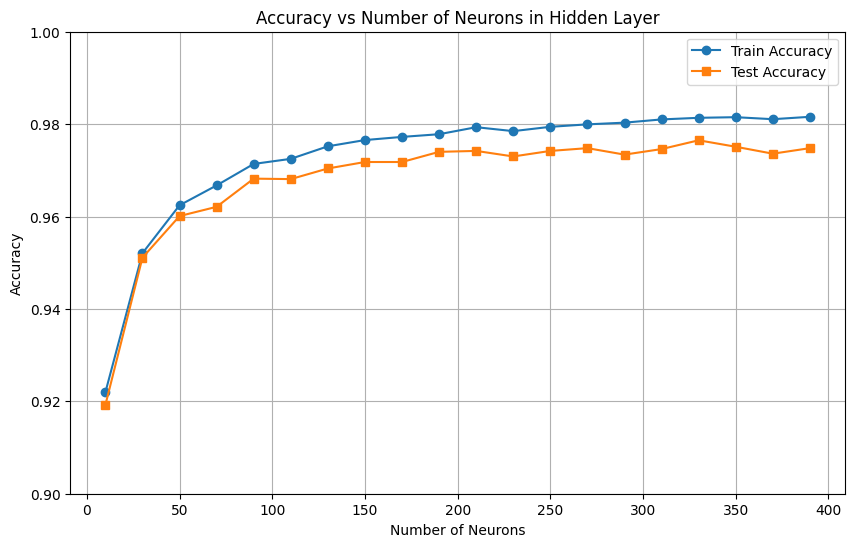

In [ ]:
# Change in Number of Neurons

neuron_list = []
train_accuracies = []
test_accuracies = []

# Loop over neurons
for neurons in range(10, 401, 20):
    model = ks.Sequential([
        ks.layers.Dense(neurons, input_shape=(784,), activation='sigmoid'),
        ks.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"\n=== Neurons: {neurons} ===")
    history = model.fit(x_train_flatten, y_train, epochs=5, verbose=0)
    train_acc = history.history['accuracy'][-1]
    test_loss, test_acc = model.evaluate(x_test_flatten, y_test, verbose=0)

    print(f"Train Accuracy (last epoch): {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Store for plotting
    neuron_list.append(neurons)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(neuron_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(neuron_list, test_accuracies, label='Test Accuracy', marker='s')
plt.title('Accuracy vs Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.ylim(0.9,1)
plt.grid(True)
plt.legend()
plt.show()


Conclusion : Trend is observed where **increasing no. of neurons increases accuracy of MLP.**
But change in accuracy ***becomes very less*** after some number.

In [ ]:
# Change in Number of Neurons
model5= ks.Sequential([
    ks.layers.Dense(50,input_shape=(784,),activation='sigmoid')
])
model5.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history5= model5.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history5= model5.evaluate(x_test_flatten, y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8049 - loss: 0.8077
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9131 - loss: 0.3120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9190 - loss: 0.2871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9248 - loss: 0.2660
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9239 - loss: 0.2707

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.3025


In [ ]:
# Change in Number of Neurons
model5= ks.Sequential([
    ks.layers.Dense(200,input_shape=(784,),activation='sigmoid')
])
model5.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history5= model5.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history5= model5.evaluate(x_test_flatten, y_test)


Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8033 - loss: 0.9053
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9141 - loss: 0.3085
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9206 - loss: 0.2851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9227 - loss: 0.2721
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9251 - loss: 0.2689

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.3039



=== Neurons: 10 ===
Train Accuracy (last epoch): 0.9255
Test Accuracy: 0.9269

=== Neurons: 20 ===
Train Accuracy (last epoch): 0.9254
Test Accuracy: 0.9260

=== Neurons: 30 ===
Train Accuracy (last epoch): 0.9265
Test Accuracy: 0.9252

=== Neurons: 40 ===
Train Accuracy (last epoch): 0.9251
Test Accuracy: 0.9262

=== Neurons: 50 ===
Train Accuracy (last epoch): 0.9250
Test Accuracy: 0.9248

=== Neurons: 60 ===
Train Accuracy (last epoch): 0.9255
Test Accuracy: 0.9258

=== Neurons: 70 ===
Train Accuracy (last epoch): 0.9264
Test Accuracy: 0.9245

=== Neurons: 80 ===
Train Accuracy (last epoch): 0.9256
Test Accuracy: 0.9262

=== Neurons: 90 ===
Train Accuracy (last epoch): 0.9250
Test Accuracy: 0.9245

=== Neurons: 100 ===
Train Accuracy (last epoch): 0.9250
Test Accuracy: 0.9267

=== Neurons: 110 ===
Train Accuracy (last epoch): 0.9258
Test Accuracy: 0.9263

=== Neurons: 120 ===
Train Accuracy (last epoch): 0.9257
Test Accuracy: 0.9225

=== Neurons: 130 ===
Train Accuracy (last epoch)

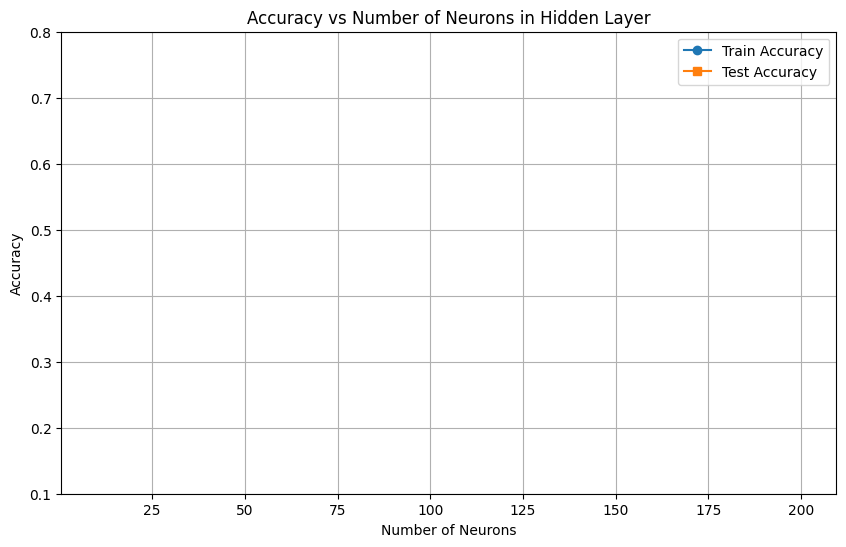

In [ ]:
# Store values
neuron_list = []
train_accuracies = []
test_accuracies = []

# Loop over neurons
for neurons in range(10, 201, 10):
    model = ks.Sequential([
        ks.layers.Dense(neurons, input_shape=(784,), activation='sigmoid'),

    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"\n=== Neurons: {neurons} ===")
    history = model.fit(x_train_flatten, y_train, epochs=5, verbose=0)
    train_acc = history.history['accuracy'][-1]
    test_loss, test_acc = model.evaluate(x_test_flatten, y_test, verbose=0)

    print(f"Train Accuracy (last epoch): {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Store for plotting
    neuron_list.append(neurons)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting


Conclusion : For Single Layer NN Change in number of neurons resulted no

In [ ]:
# Using in-built Flatten Layer
x_train_flatten= x_train_flatten/255
x_test_flatten= x_test_flatten/255
model3= ks.Sequential([
    ks.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history3= model3.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history3= model3.evaluate(x_test_flatten, y_test)


Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8113 - loss: 0.7235
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9136 - loss: 0.3092
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9201 - loss: 0.2855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9258 - loss: 0.2676
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9258 - loss: 0.2620

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9144 - loss: 0.3017


In [ ]:
model5= ks.Sequential([
    ks.layers.Flatten(input_shape=(28,28)),
    ks.layers.Dense(10,activation='sigmoid')
])
model5.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history5= model5.fit(x_train/255, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history5= model5.evaluate(x_test/255, y_test)

Training Accuracy
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8171 - loss: 0.7186
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9128 - loss: 0.3131
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9202 - loss: 0.2816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9216 - loss: 0.2763
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9263 - loss: 0.2665

Testing Accuracy
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.3016


# Conclusion : Scratch implementation of Flattening gave same results compared to keras in built Flatten Layer

In [ ]:
# Adding hidden Layers

model5= ks.Sequential([
    ks.layer.Flatten(input_shape=(28,28)),
    ks.layers.Dense(50,activation='sigmoid')
])
model5.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training Accuracy")
train_history5= model5.fit(x_train_flatten, y_train, epochs=5)
print()
print("Testing Accuracy")
test_history5= model5.evaluate(x_test_flatten, y_test)